# By Ahmad Alkaseb

## Data collection

In [464]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
# Load the data into a dataframe using pandas library
df = pd.read_csv('school-shootings-data.csv')

## Data cleaning

In [392]:
# Let's have a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    410 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  392 non-null    float64
 4   district_name                     391 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              386 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

We have 416 rows. We can see that we have missing values. Let's fix that.

In [395]:
# Replacing all the string columns with the mode 
df['nces_school_id'] = df['nces_school_id'].fillna(df['nces_school_id'].mode()[0])
df['district_name'] = df['district_name'].fillna(df['district_name'].mode()[0])
df['time'] = df['time'].fillna(df['time'].mode()[0])
df['gender_shooter1'] = df['gender_shooter1'].fillna(df['gender_shooter1'].mode()[0])
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].fillna(df['race_ethnicity_shooter1'].mode()[0])
df['shooter_relationship1'] = df['shooter_relationship1'].fillna(df['shooter_relationship1'].mode()[0])
df['deceased_notes1'] = df['deceased_notes1'].fillna(df['deceased_notes1'].mode()[0])
df['gender_shooter2'] = df['gender_shooter2'].fillna(df['gender_shooter2'].mode()[0])
df['race_ethnicity_shooter2'] = df['race_ethnicity_shooter2'].fillna(df['race_ethnicity_shooter2'].mode()[0])
df['shooter_relationship2'] = df['shooter_relationship2'].fillna(df['shooter_relationship2'].mode()[0])
df['deceased_notes2'] = df['deceased_notes2'].fillna(df['deceased_notes2'].mode()[0])
df['black'] = df['black'].fillna(df['black'].mode()[0])
df['hispanic'] = df['hispanic'].fillna(df['hispanic'].mode()[0])
df['weapon'] = df['weapon'].fillna(df['weapon'].mode()[0])
df['weapon_source'] = df['weapon_source'].fillna(df['weapon_source'].mode()[0])
df['low_grade'] = df['low_grade'].fillna(df['low_grade'].mode()[0])
df['high_grade'] = df['high_grade'].fillna(df['high_grade'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['county'] = df['county'].fillna(df['county'].mode()[0])

In [397]:
# Replacing all the number columns with the mean
df['nces_district_id'] = df['nces_district_id'].fillna(df['nces_district_id'].mean())
df['age_shooter1'] = df['age_shooter1'].fillna(df['age_shooter1'].mean())
df['shooter_deceased1'] = df['shooter_deceased1'].fillna(df['shooter_deceased1'].mean())
df['age_shooter2'] = df['age_shooter2'].fillna(df['age_shooter2'].mean())
df['shooter_deceased2'] = df['shooter_deceased2'].fillna(df['shooter_deceased2'].mean())
df['white'] = df['white'].fillna(df['white'].mean())
df['asian'] = df['asian'].fillna(df['asian'].mean())
df['american_indian_alaska_native'] = df['american_indian_alaska_native'].fillna(df['american_indian_alaska_native'].mean())
df['hawaiian_native_pacific_islander'] = df['hawaiian_native_pacific_islander'].fillna(df['hawaiian_native_pacific_islander'].mean())
df['two_or_more'] = df['two_or_more'].fillna(df['two_or_more'].mean())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())
df['staffing'] = df['staffing'].fillna(df['staffing'].mean())
df['ulocale'] = df['ulocale'].fillna(df['ulocale'].mean())

In [399]:
# Let's see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    416 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  416 non-null    float64
 4   district_name                     416 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              416 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

## Data Exploration & Analysis

In [402]:
# Let's have a look at the data
df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.600000,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.000000,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.000000,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.000000,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,61.911803,9,12,543,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,418,110003000079,Dunbar High School,1100030.0,District Of Columbia Public Schools,5/3/24,2023-2024,2024,9:55 AM,Friday,...,38.907695,-77.012836,60.500000,9,12,584,District Of Columbia,11,11001,11.0
412,419,550999000385,Mount Horeb Middle School,5509990.0,Mount Horeb Area School District,5/1/24,2023-2024,2024,11:00 AM,Wednesday,...,43.006314,-89.728462,41.730000,6,8,64,Dane County,55,55025,31.0
413,420,370150000631,Parkland High School,3701500.0,Winston Salem / Forsyth County Schools,5/7/24,2023-2024,2024,12:00 PM,Tuesday,...,36.057000,-80.257100,89.640000,9,12,1510,Forsyth County,37,37067,12.0
414,421,530771001171,Garfield High School,5307710.0,Seattle School District NO. 1,6/7/24,2023-2024,2024,12:45 PM,Friday,...,47.605000,-122.301900,68.200000,9,12,660,King County,53,53033,11.0


In [404]:
print('Rows: {} Columns: {} Size: {}'.format(df.shape[0], df.shape[1], df.size))

Rows: 416 Columns: 50 Size: 20800


In [406]:
# Let's remove the uncessery attributes. We will remove the following attributes:
df = df.drop(
    ['nces_school_id',
    'school_name',
    'nces_district_id', 
    'district_name', 
    'school_year', 
    'shooter_deceased1', 
    'deceased_notes1', 
    'shooter_deceased2', 
    'deceased_notes2', 
    'lat', 
    'long', 
    'county', 
    'state_fips', 
    'county_fips'], axis=1)

In [408]:
# let's check if it worked:
print('Columns left: {}'.format(df.shape[1]))

Columns left: 36


array([[<Axes: title={'center': 'uid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'killed'}>,
        <Axes: title={'center': 'injured'}>],
       [<Axes: title={'center': 'casualties'}>,
        <Axes: title={'center': 'age_shooter1'}>,
        <Axes: title={'center': 'age_shooter2'}>,
        <Axes: title={'center': 'white'}>],
       [<Axes: title={'center': 'asian'}>,
        <Axes: title={'center': 'american_indian_alaska_native'}>,
        <Axes: title={'center': 'hawaiian_native_pacific_islander'}>,
        <Axes: title={'center': 'two_or_more'}>],
       [<Axes: title={'center': 'resource_officer'}>,
        <Axes: title={'center': 'staffing'}>,
        <Axes: title={'center': 'ulocale'}>, <Axes: >]], dtype=object)

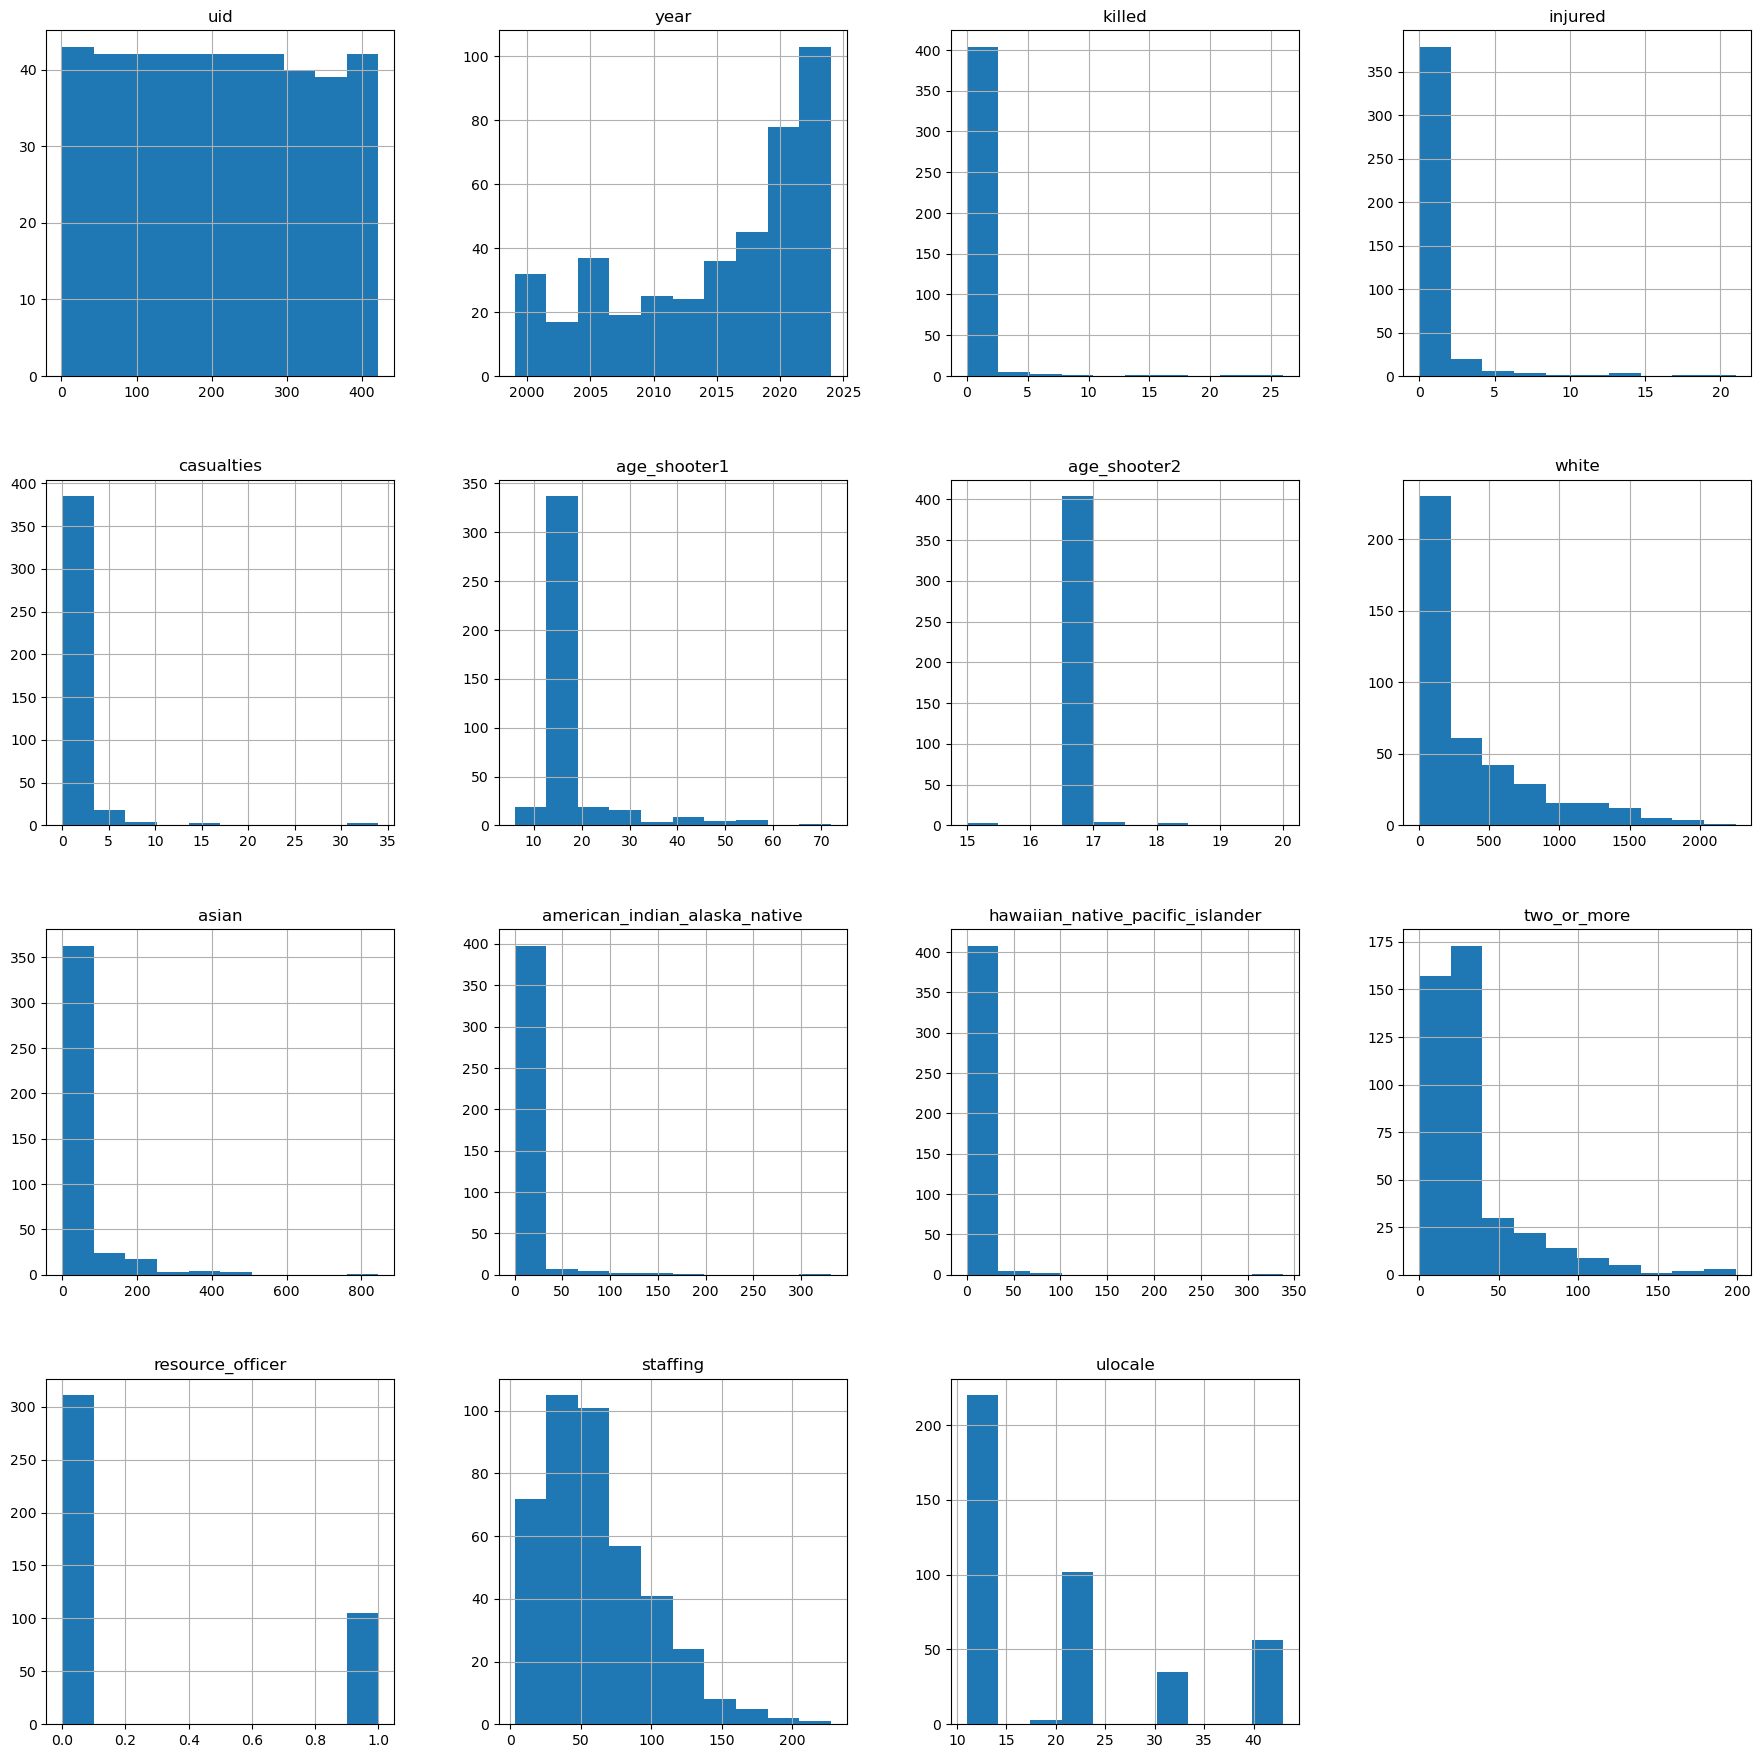

In [414]:
df.hist(figsize=(22, 22))

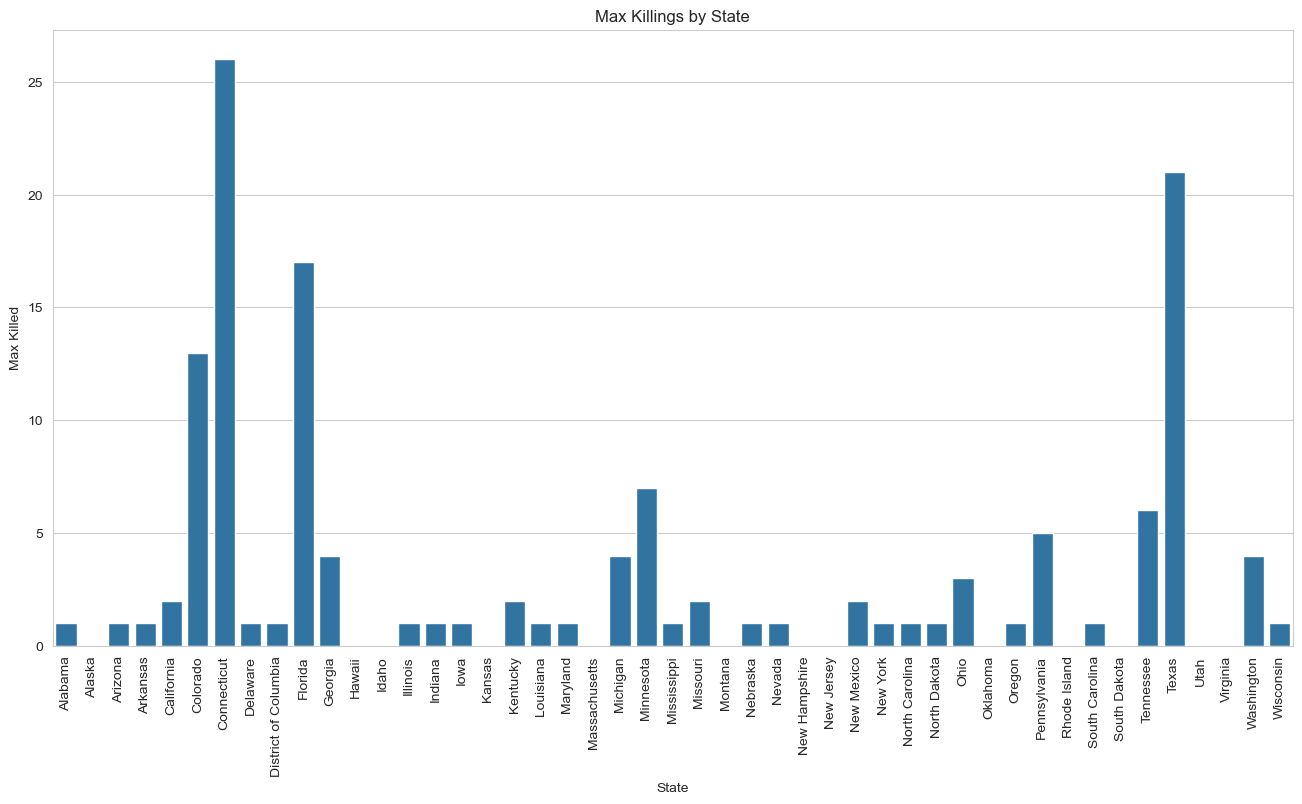

In [482]:
# Bar plot of killings by state
df_grouped = df.groupby('state')['killed'].max().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x='state', y='killed', data=df_grouped)
plt.title('Max Killings by State')
plt.xlabel('State')
plt.ylabel('Max Killed')
plt.xticks(rotation=90)
plt.show()

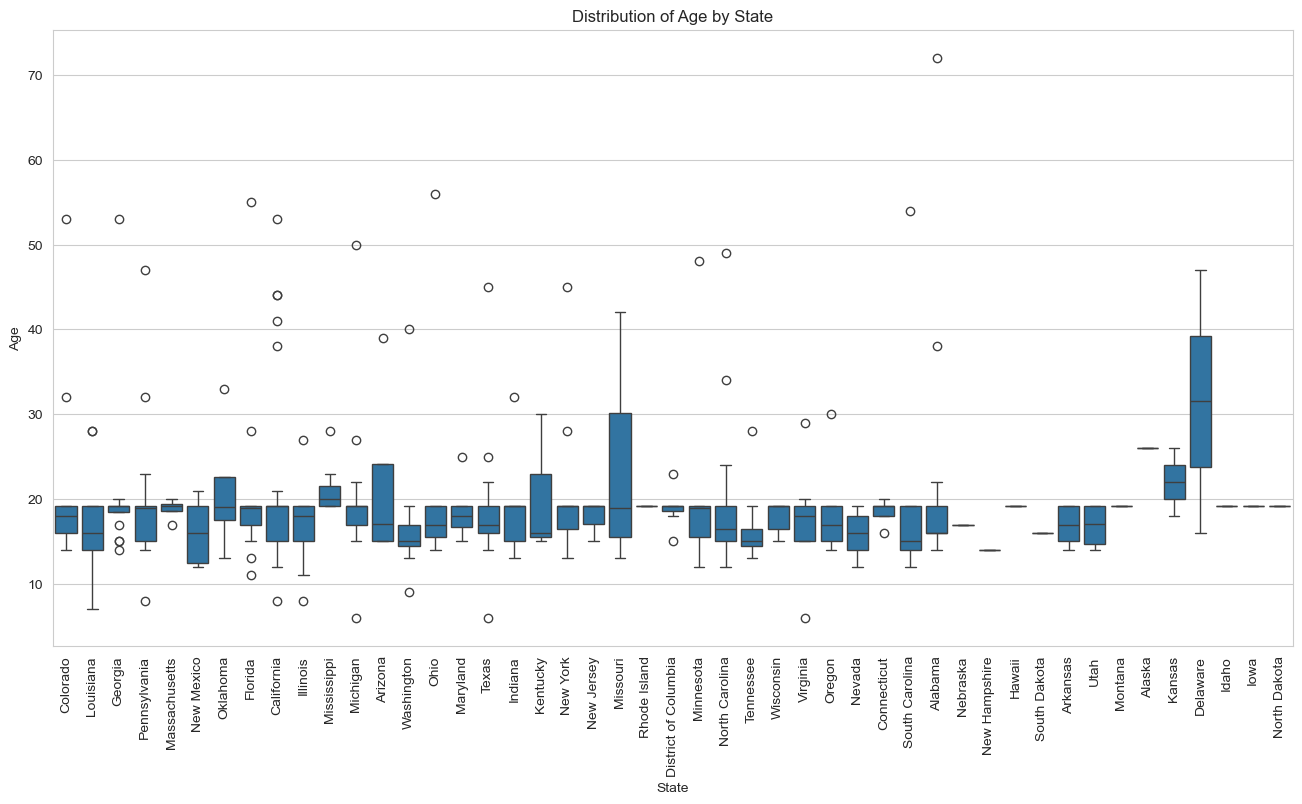

In [515]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='state', y='age_shooter1', data=df)
plt.title('Distribution of Age by State')
plt.xlabel('State')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

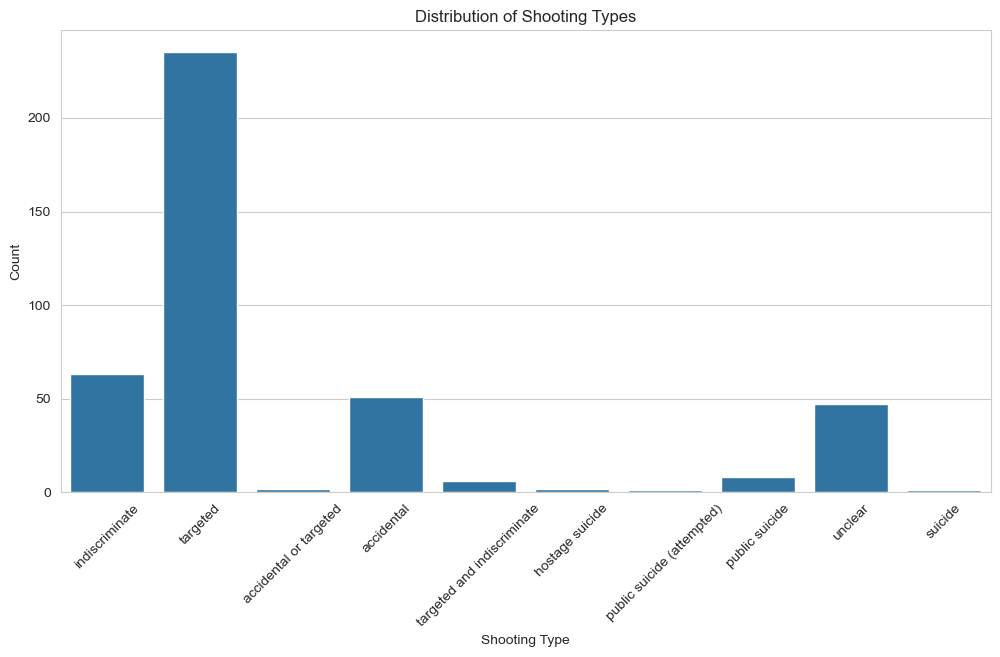

In [542]:
plt.figure(figsize=(12, 6))
sns.countplot(x='shooting_type', data=df)
plt.title('Distribution of Shooting Types')
plt.xlabel('Shooting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [338]:
# Convert all the strings to numbers
#df = pd.get_dummies(df)

In [342]:
# Check if the data has been updated
df

,uid,year,killed,injured,casualties,age_shooter1,age_shooter2,white,asian,american_indian_alaska_native,...,lunch_931,lunch_941,lunch_952,lunch_959,lunch_980,lunch_982,lunch_987,lunch_99,lunch_992,lunch_994
0,1,1999,13,21,34,18.000000,17.000000,1783.0,42.0,12.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1999,0,1,1,14.000000,16.916667,5.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,1999,0,6,6,15.000000,16.916667,1189.0,15.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,1999,0,1,1,17.000000,16.916667,209.0,170.0,5.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1999,0,1,1,19.194444,16.916667,40.0,29.0,5.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,418,2024,0,1,1,19.194444,16.916667,2.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
412,419,2024,1,0,1,19.194444,16.916667,447.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
413,420,2024,0,1,1,19.194444,16.916667,114.0,8.0,5.0,...,False,False,False,False,False,False,False,False,False,False
414,421,2024,1,0,1,19.194444,16.916667,604.0,205.0,4.0,...,False,False,False,False,False,False,False,False,False,False


In [344]:
# Get information about the data
df.describe()

,uid,year,killed,injured,casualties,age_shooter1,age_shooter2,white,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,staffing,ulocale
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,209.423077,2014.875000,0.507212,1.105769,1.598558,19.194444,16.916667,358.778325,39.810345,8.022222,4.896907,31.941581,0.252404,61.911803,19.760291
std,121.550243,7.595417,2.105631,2.155042,3.720979,8.003781,0.245031,449.805195,82.633148,24.763012,18.908461,31.881180,0.434915,38.175691,10.605439
min,1.000000,1999.000000,0.000000,0.000000,0.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,104.750000,2008.000000,0.000000,0.000000,0.000000,15.000000,16.916667,14.750000,1.000000,0.000000,0.000000,8.000000,0.000000,34.300000,11.000000
50%,208.500000,2018.000000,0.000000,1.000000,1.000000,18.000000,16.916667,147.500000,9.000000,2.000000,2.000000,31.941581,0.000000,58.110000,13.000000
75%,312.250000,2021.000000,0.000000,1.000000,1.000000,19.194444,16.916667,555.250000,36.250000,6.000000,4.896907,31.941581,1.000000,84.250000,22.000000
max,422.000000,2024.000000,26.000000,21.000000,34.000000,72.000000,20.000000,2256.000000,846.000000,331.000000,338.000000,199.000000,1.000000,227.180000,43.000000


In [366]:
# Print out the quantiles
df.killed.quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
Name: killed, dtype: float64

array([[<Axes: title={'center': 'uid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'killed'}>,
        <Axes: title={'center': 'injured'}>],
       [<Axes: title={'center': 'casualties'}>,
        <Axes: title={'center': 'age_shooter1'}>,
        <Axes: title={'center': 'age_shooter2'}>,
        <Axes: title={'center': 'white'}>],
       [<Axes: title={'center': 'asian'}>,
        <Axes: title={'center': 'american_indian_alaska_native'}>,
        <Axes: title={'center': 'hawaiian_native_pacific_islander'}>,
        <Axes: title={'center': 'two_or_more'}>],
       [<Axes: title={'center': 'resource_officer'}>,
        <Axes: title={'center': 'staffing'}>,
        <Axes: title={'center': 'ulocale'}>, <Axes: >]], dtype=object)

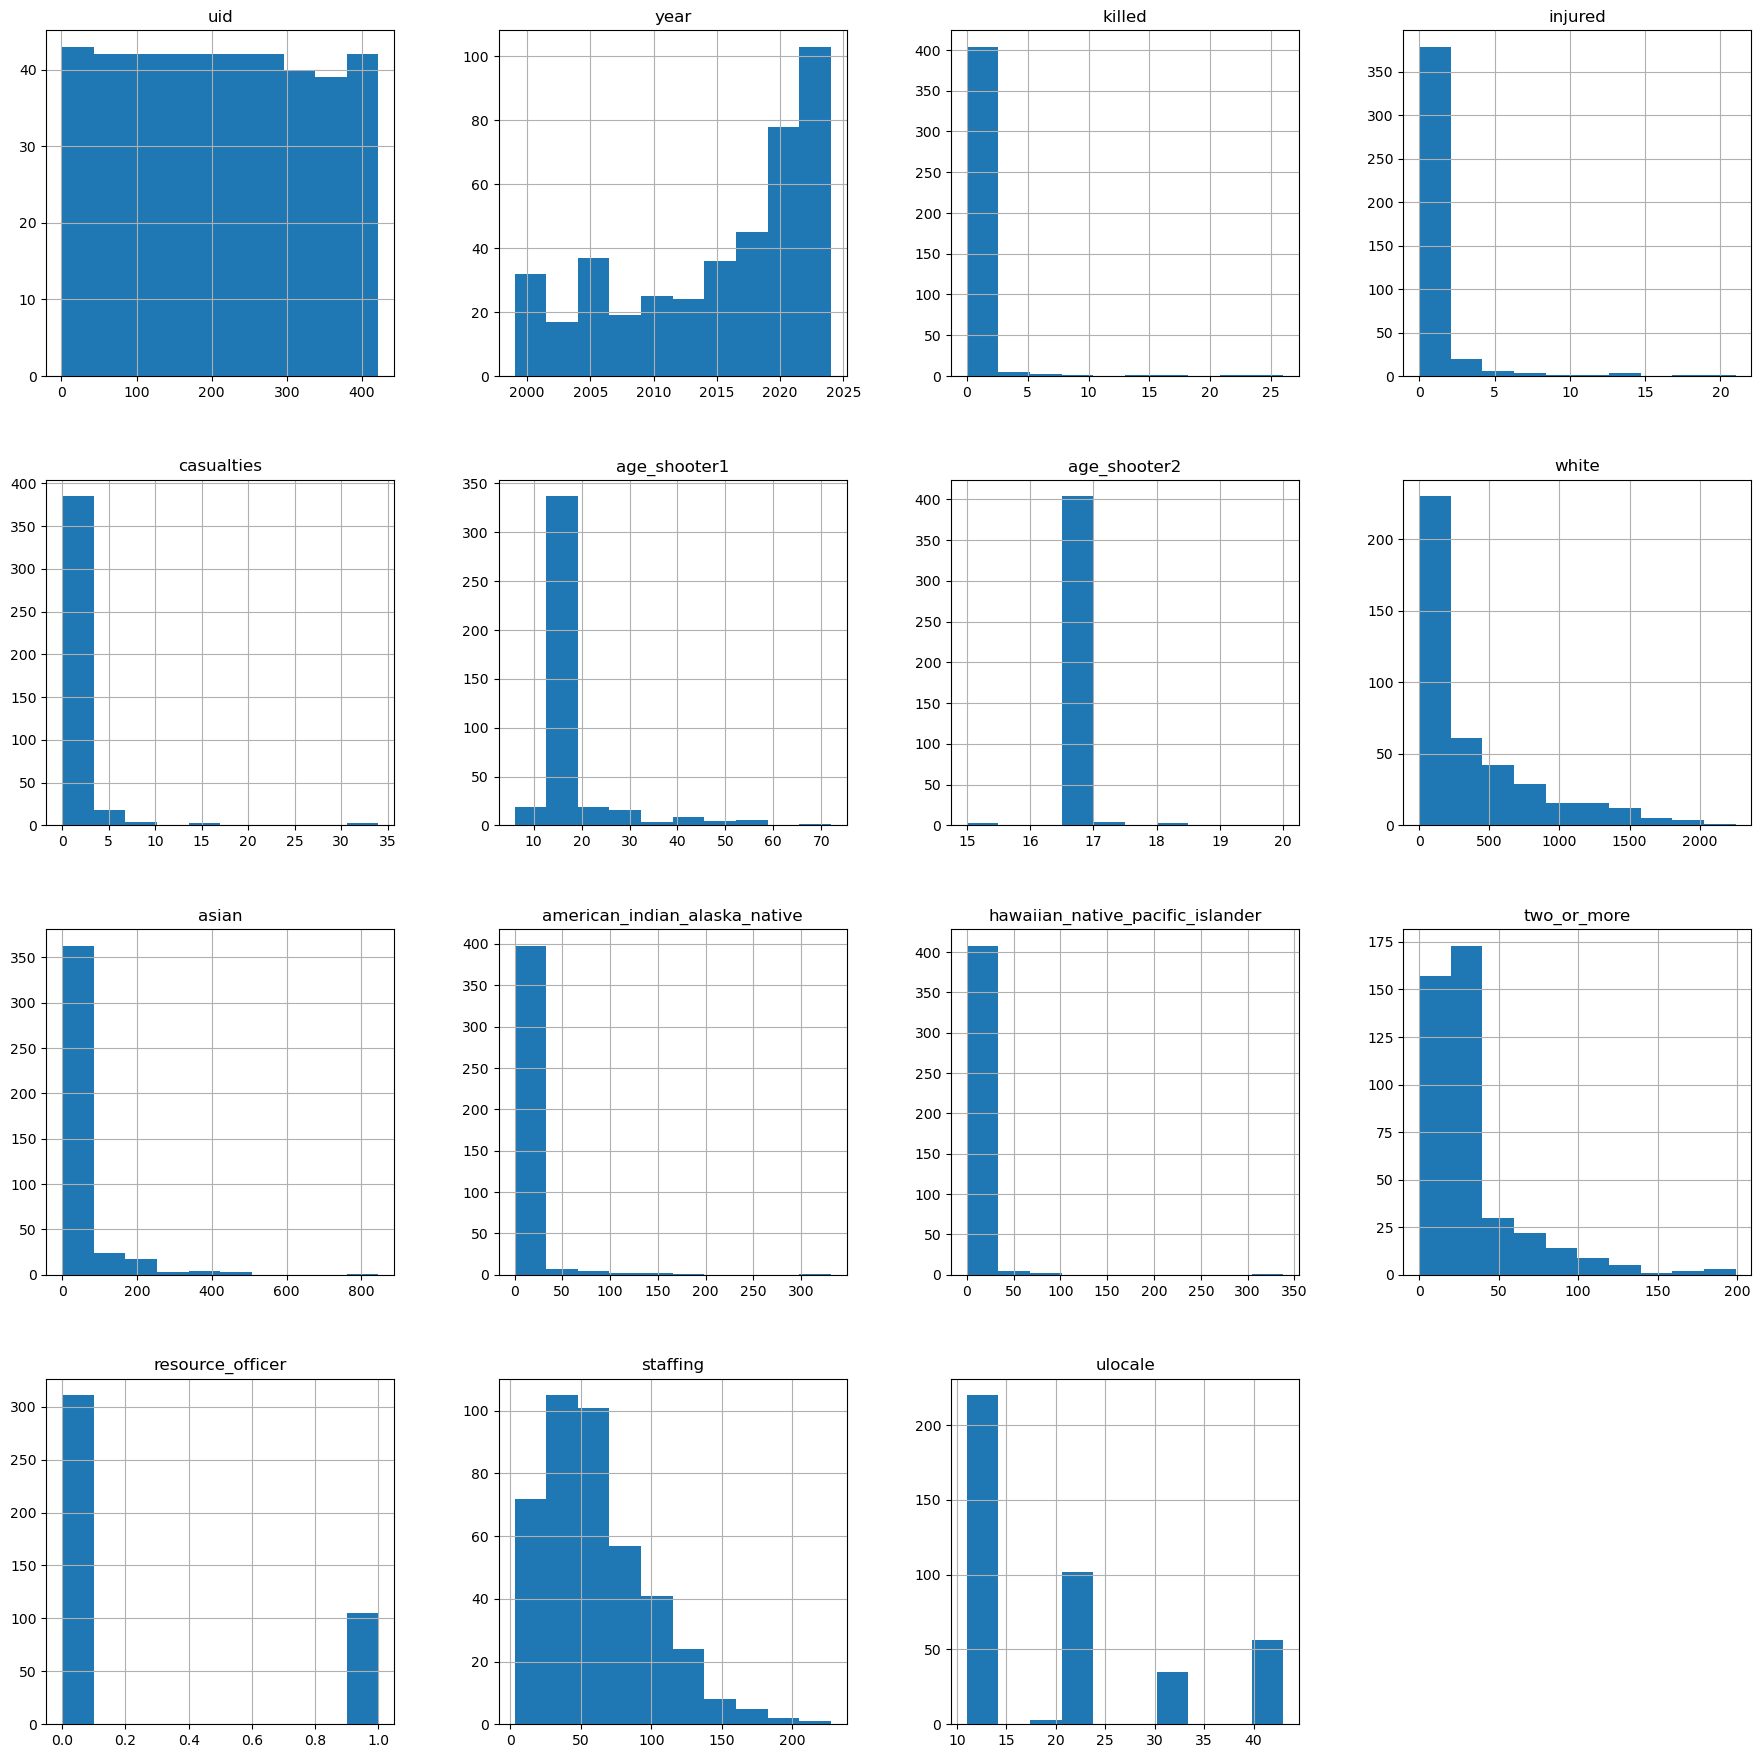

In [375]:
# Let's have a look at them through histograms
df.hist(figsize=(22, 22))

In [383]:
# Box and whiskers plot
df.boxplot(column=['killed'], by='state', showmeans=True)
plt.title('Alcohol Content Distribution by Wine Type')
plt.suptitle('')  # Removes the automated title
plt.xlabel('Wine Type')
plt.ylabel('Alcohol')

KeyError: 'state'